Number of Emergency Visits in the Year Preceding the Encounter: How is the number of emergency visits the diabetic patients have in the year leading up to their hospital encounter related to the probability of a successful inpatient treatment for the patient? (Yuki Han)

In [1]:
! pip uninstall ucimlrepo -y

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as sk # machine learning library

In [123]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296) 
  
# data (as pandas dataframes) 
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features 
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets 
  
# metadata 
print(diabetes_130_us_hospitals_for_years_1999_2008.metadata) 
  
# variable information 
print(diabetes_130_us_hospitals_for_years_1999_2008.variables) 


{'uci_id': 296, 'name': 'Diabetes 130-US hospitals for years 1999-2008', 'repository_url': 'https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008', 'data_url': 'https://archive.ics.uci.edu/static/public/296/data.csv', 'abstract': 'The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge.\nThe problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide pro

/Users/hanziyan/Desktop/STAT303_GROUP/ucimlrepo/fetch.py:100: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [124]:
ids = diabetes_130_us_hospitals_for_years_1999_2008.data.ids
data = diabetes_130_us_hospitals_for_years_1999_2008.data.features

data = data.join(ids)

data["readmitted"] = diabetes_130_us_hospitals_for_years_1999_2008.data.targets

data = data.drop_duplicates(subset=["patient_nbr"], keep='first')

data = data.loc[data.gender!="Unknown/Invalid",:]

In [161]:
data.corrwith(data.number_emergency)

/var/folders/bn/tmyrlttx5gx6097tb3r6bbvr0000gn/T/ipykernel_51370/3860207834.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corrwith(data.number_emergency)


admission_type_id          -0.017269
discharge_disposition_id   -0.026472
admission_source_id         0.056718
time_in_hospital           -0.009808
num_lab_procedures          0.014087
num_procedures             -0.035173
num_medications             0.002400
number_outpatient           0.095000
number_emergency            1.000000
number_inpatient            0.146545
number_diagnoses            0.049235
encounter_id                0.051459
patient_nbr                 0.056346
dtype: float64

In [150]:
num_cols = list(["time_in_hospital","num_lab_procedures","num_procedures","num_medications","number_outpatient","number_emergency","number_inpatient","number_diagnoses"])

from sklearn.preprocessing import MinMaxScaler

# create the scaler function
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(data.loc[:,num_cols])
data_new = pd.DataFrame(scaled_data)
data_new.columns=num_cols

In [152]:
data_new.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,71515.000000,71515.000000,71515.000000,71515.000000,71515.000000,71515.000000,71515.000000,71515.000000
mean,0.253013,0.321190,0.238421,0.183812,0.006669,0.002465,0.014820,0.416384
std,0.226861,0.152306,0.293308,0.103890,0.025452,0.012124,0.050317,0.132977
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.076923,0.229008,0.000000,0.112500,0.000000,0.000000,0.000000,0.333333
50%,0.153846,0.328244,0.166667,0.162500,0.000000,0.000000,0.000000,0.466667
75%,0.384615,0.427481,0.333333,0.237500,0.000000,0.000000,0.000000,0.533333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


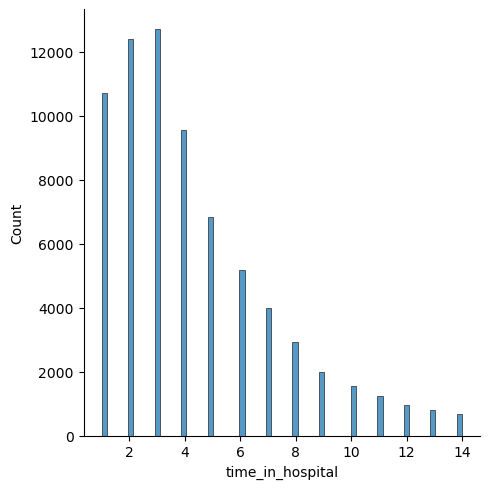

In [154]:
# a = sns.displot(x = 'time_in_hospital',
# #                 col = "readmitted",
# #                 col_wrap =3,
#                 data = data,
#                 kind = 'hist'
# #                 clip=(0,15)
#                )

In [82]:
# binned_time_in_hospital = pd.qcut(data['time_in_hospital'],5,retbins = True)
# data["binned_time_in_hospital"] = binned_time_in_hospital[0]

# pd.value_counts(data.binned_time_in_hospital)

/var/folders/bn/tmyrlttx5gx6097tb3r6bbvr0000gn/T/ipykernel_51370/2432408893.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["binned_time_in_hospital"] = binned_time_in_hospital[0]


(0.999, 2.0]    31432
(4.0, 7.0]      23364
(2.0, 3.0]      17756
(7.0, 14.0]     15290
(3.0, 4.0]      13924
Name: binned_time_in_hospital, dtype: int64

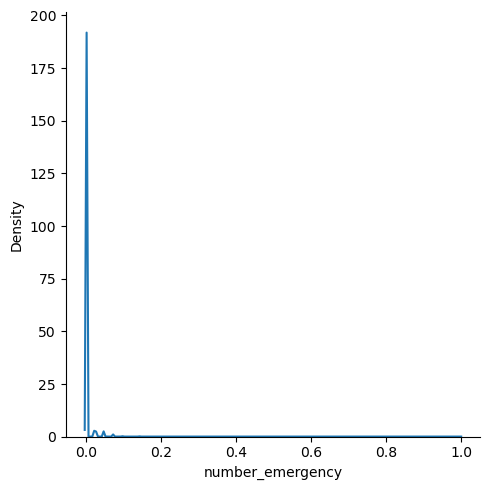

In [159]:
sns.displot(data = data_new, x = 'number_emergency', kind = 'kde', clip=(-1,1)) # 'kind =' is necessary for displot, not necessary for histplot()
# sns.histplot() also works
plt.show()

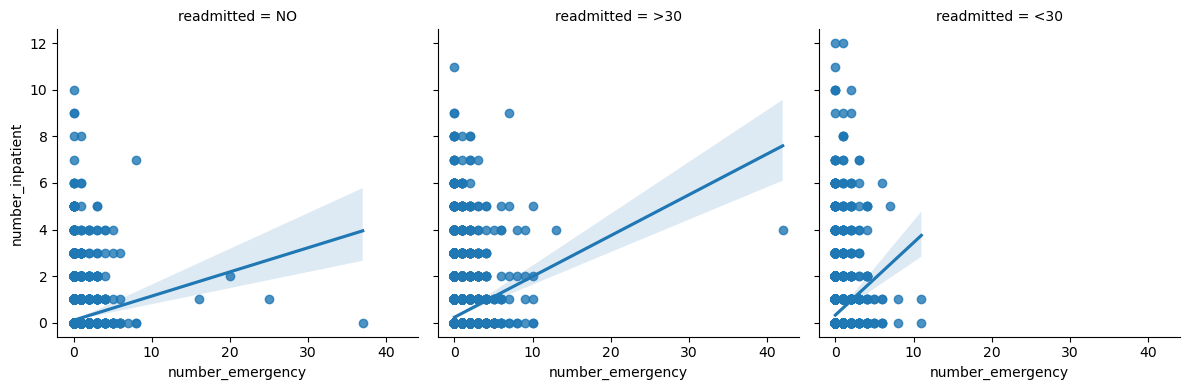

In [162]:
a = sns.FacetGrid(data, col = 'readmitted', height = 4, aspect =1, col_wrap=3)

a.map(sns.regplot,'number_emergency', 'number_inpatient')

50